In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve



In [2]:
df = pd.read_excel("stroke.xlsx")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isnull().sum(axis = 0)
#the number of empty values were counted, this allows the cleaning and transformations of data to be performed before 
# with the analysis

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.fillna(df.mean())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot:>

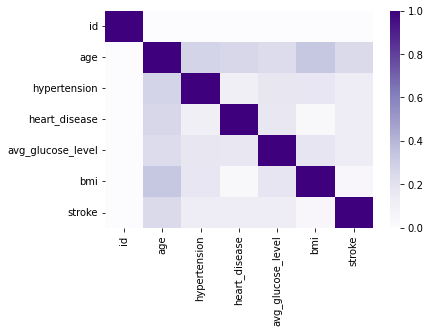

In [5]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="Purples")

In [6]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap = "Purples", axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


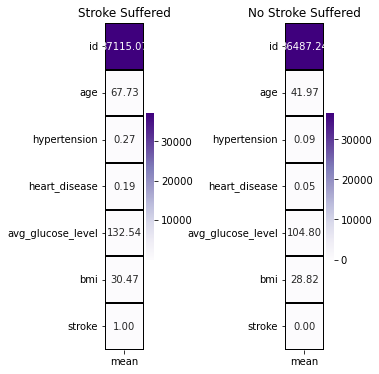

In [7]:
stroke = df[df['stroke'] == 1].describe().T
no_stroke = df[df['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = plt.cm.Purples,linewidths = 0.4,linecolor = 'black',cbar = True,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = plt.cm.Purples,linewidths = 0.4,linecolor = 'black',cbar = True,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

The dataset was split into cases of strokes suffered and no strokes, and the mean of all the features of the dataset were described. It is observed that patients of an older age group, higher glucose level and bmi were the ones who had a higher occurrence of strokes, the id box is ignored as ID is just an identifier and nothing significant.

In [8]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df.ever_married.value_counts()


Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [13]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Because these columns have a few unique values and they are categorical, they will be transformed into numerical data by using a dictionary and some mapping, this is to make sure that the data is usable and easily processed by the algorithms, models and visualization that will be used later in the notebook.

In [14]:
col = list(df.columns)
categorical_features = []
discrete_features = []
# a library for
for i in col:
    if len(df[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

df['age'] = df['age'].astype(int)
df1 = df.copy(deep = True)
# age will be kept as an integer and classified as a discrete feature
# the old dataset will be saved as df1 if it is needed again for other purposes


Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : id age avg_glucose_level bmi


In [15]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 166.51it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [16]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

As the dataset being used has many categorical features, a label encoder was used to transform the categorical data into a numerical form with the new version of what the older categorical features have been transformed into, this is to ease the analysis and models that will be used.

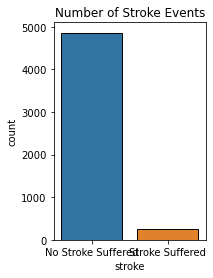

In [17]:
plt.subplot(1,2,2)
ax = sns.countplot('stroke',data = df1,edgecolor = 'black')
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()

The data is shown to be highly imbalanced, as the number of no strokes suffered compared with those patients who have suffered strokes are almost larger than 90% of the dataset being used. This can lead to weaken the statistical power of the analysis because if a model is created to make predictions, it will result in a heavily skewed result where most of the predictions will be predicting cases with no strokes suffered. To solve this issue, 2 approaches can be done which are undersampling the number of no strokes suffered and oversampling the number of strokes suffered. This can be done by using the SMOTE approach which will be conducted prior to creating models. 

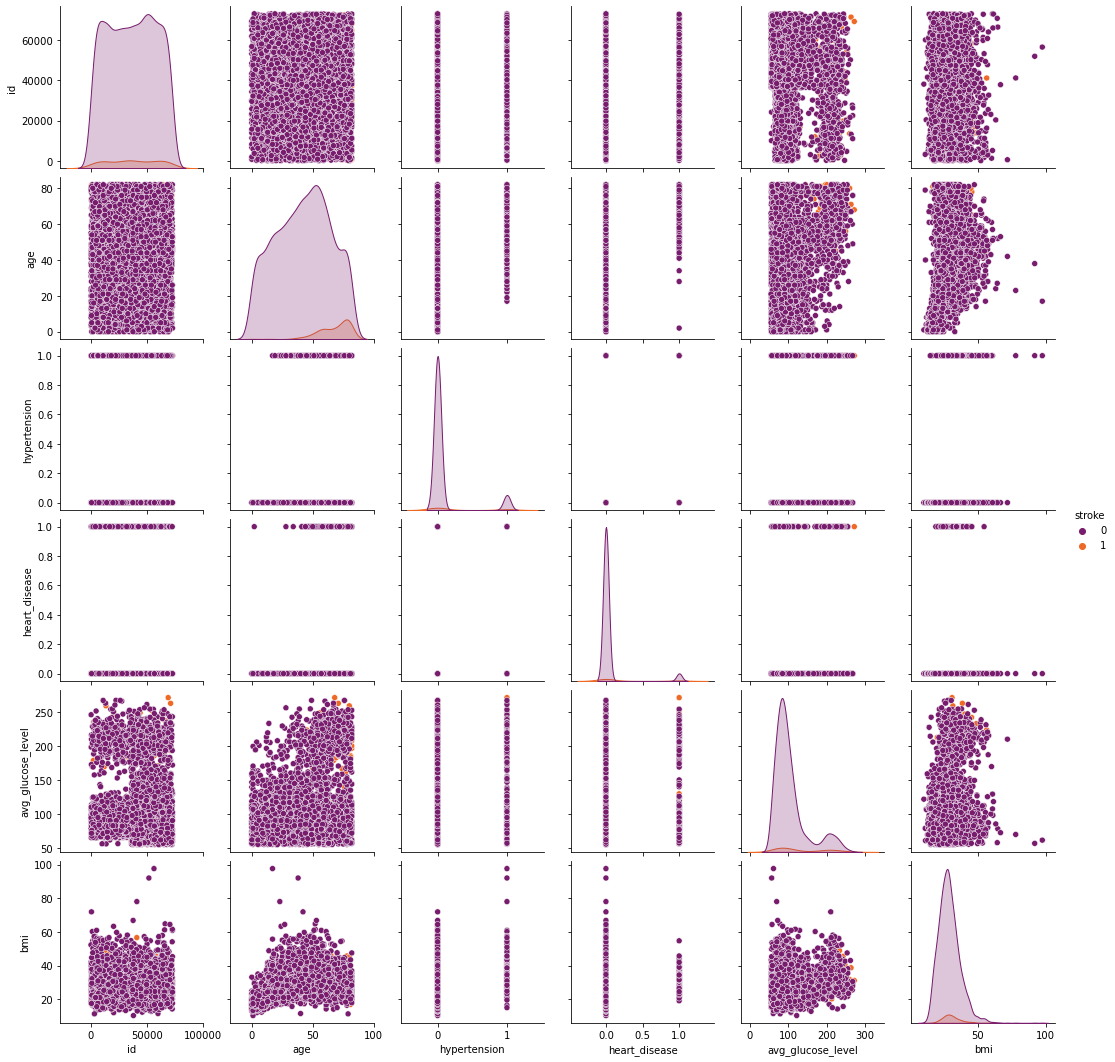

In [18]:
sns.pairplot(df, hue="stroke", palette="inferno" ,height=2.5)

From the above pairplot, the distributions and scatterplots of the various featuers can be easily compared and with the hue parameter. Visually identifying where the patients with strokes lie within the features can be also be done by identifying the darker circles within the visuals. It os observed that those who experienced strokes tended to have higher average glucose levels, older in age and some had heart diseases. However, as there is a class imbalance in the number of occurrences of strokes, it is difficult to clearly identify a relationship between patients having strokes and the features being analysed.

The distributions of the continous data is normal, with average glucose level and bmi being highly positively skewed.

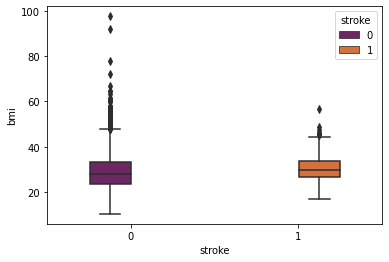

In [19]:
sns.boxplot(x= "stroke", y="bmi", hue="stroke", data=df, palette="inferno", width=0.5)
plt.show()

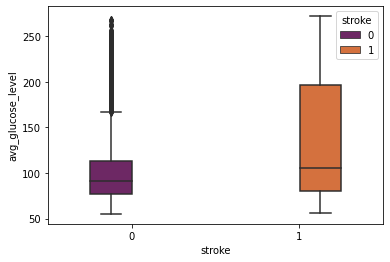

In [20]:
sns.boxplot(x= "stroke", y="avg_glucose_level", hue="stroke", data=df, palette="inferno", width=0.5)
plt.show()

In [21]:
# create new columns, filled with 0s
df['bmiOL'] = 0 
df['glucoseOL'] = 0

# calculate the mean and standard deviations
bmim = df['bmi'].mean()
bmis = df['bmi'].std()
glucm = df['avg_glucose_level'].mean()
glucs = df['avg_glucose_level'].std()

df['bmiOL'] = np.where(abs(df['bmi'] - bmim) > 2 * bmis, 1, 0)
df['glucoseOL'] = np.where(abs(df['avg_glucose_level'] - glucm) > 2 * glucs, 1, 0)

from collections import Counter
print(Counter(df['bmiOL']))
print(Counter(df['glucoseOL']))



Counter({0: 4931, 1: 179})
Counter({0: 4640, 1: 470})


When counting the outliers in the bmi and average glucose level columns, we see that there are 179 outliers for bmi and 470 outliers for glucose levels, we will display their positions in the distribution using color filters below.

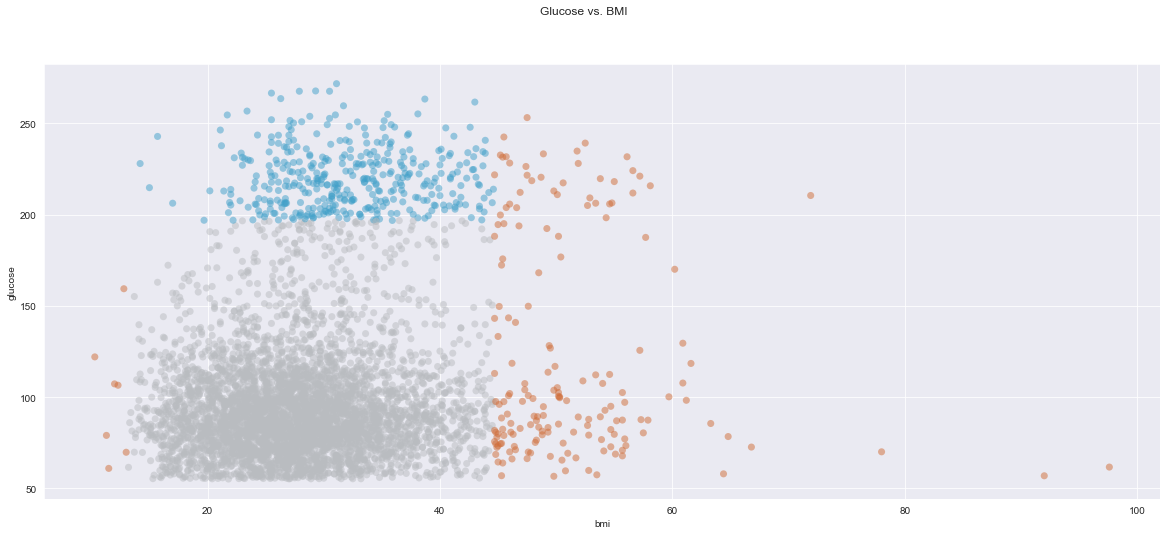

In [46]:
colorColumn = []
# we make use of the HEX color codes
# Adobe Color CC is a nice resource to find colors (https://color.adobe.com/)
for i in range(len(df)):
    if df["bmiOL"][i] == 1:
        colorColumn.append("#D06B36ff") # orange color
    elif df["glucoseOL"][i] == 1:
        colorColumn.append("#40A0C977") # a blueish color
    else:
        colorColumn.append("#B9BCC077") # gray

plt.xlabel('bmi')
plt.suptitle('Glucose vs. BMI')
plt.ylabel('glucose')
plt.scatter(df.bmi, df.avg_glucose_level ,alpha=0.5, c = colorColumn, s = 50, linewidth= 0)

There is quite a significant number of outliers within bmi and glucose levels, the outliers being in the extreme ranges of BMI may be due to incorrect reading and therefore can be ignored. The other outliers remaining in the distribution can be tolerated because of the assumption that as average glucose level and BMI are normally distributed, it is expected to have a number of individuals with values of those characteristics to be at the edges of a normal distribution. 

In [23]:
categorical_features.remove('stroke')

Stroke is removed from categorical features as it is the target variable, and it is not being compared with other features.

posx and posy should be finite values
posx and posy should be finite values


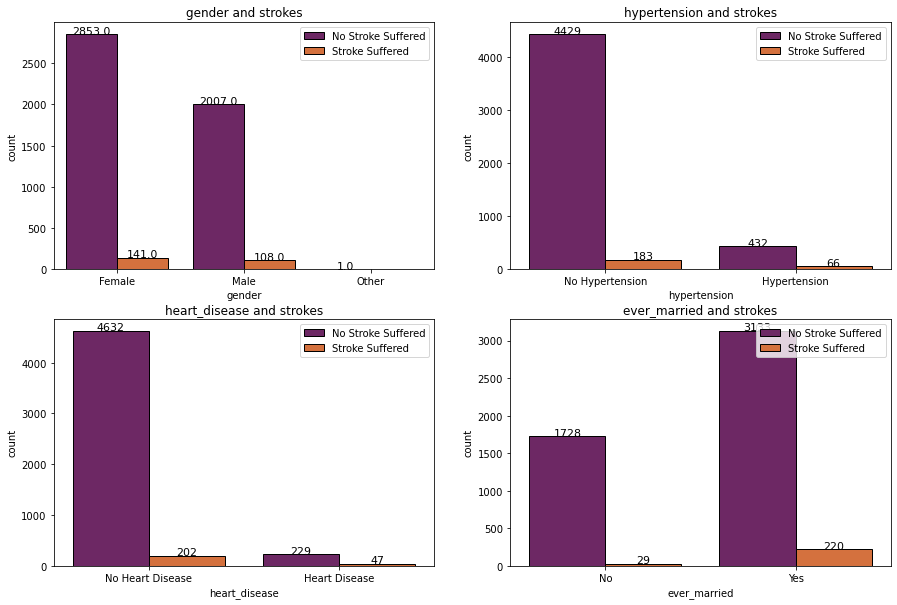

posx and posy should be finite values
posx and posy should be finite values


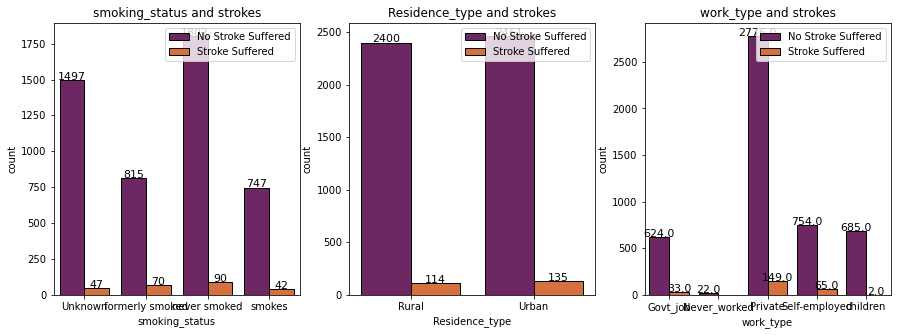

In [24]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = 'inferno',edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' and strokes'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = 'inferno',edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' and strokes'
    plt.title(title);

From the above count plots, it is observed that it is quite difficult to ascertain which categorical features are ones that contribute most to individuals who suffered strokes. The next step in the exploratory data analysis will be to do similar countplots with the numerical features. It is important to keep in mind that these patterns are similar but also it is because of the massive class imbalance in the dataset being used.

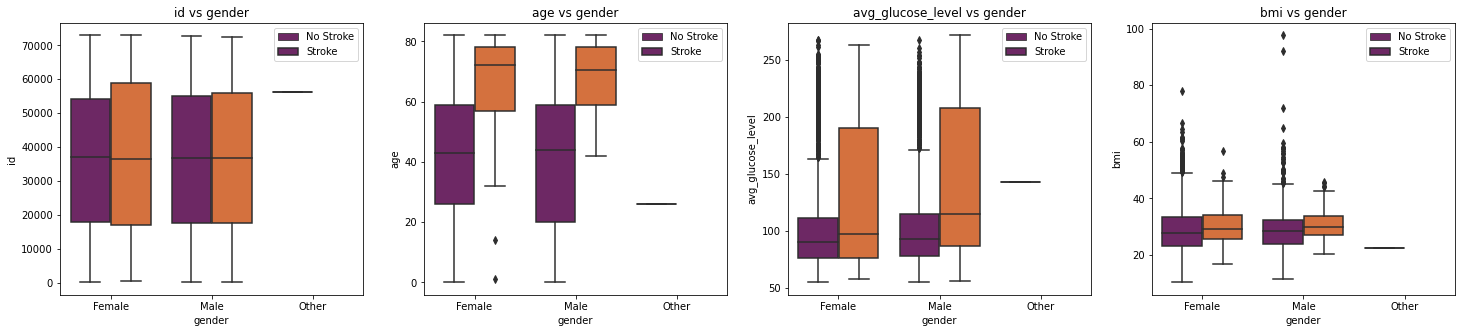

In [25]:
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = 'inferno');
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);



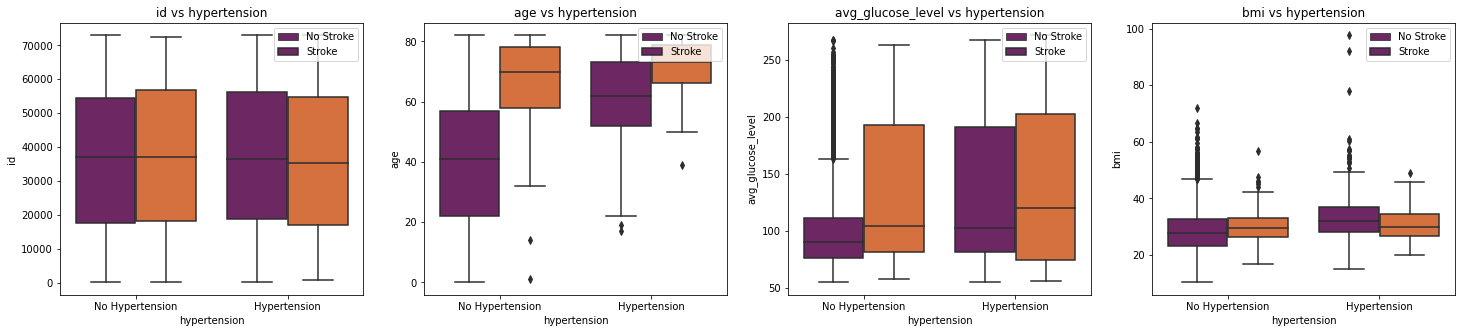

In [26]:
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = 'inferno');
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);


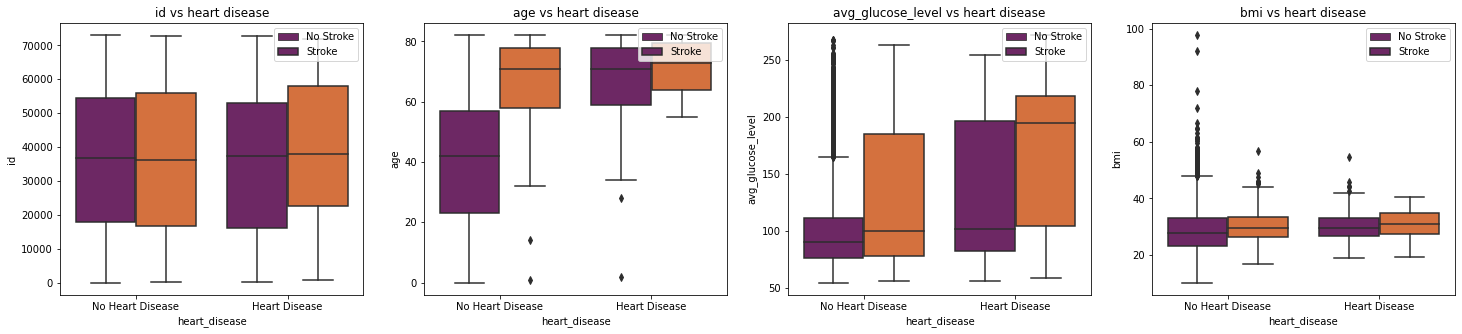

In [27]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = 'inferno');
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

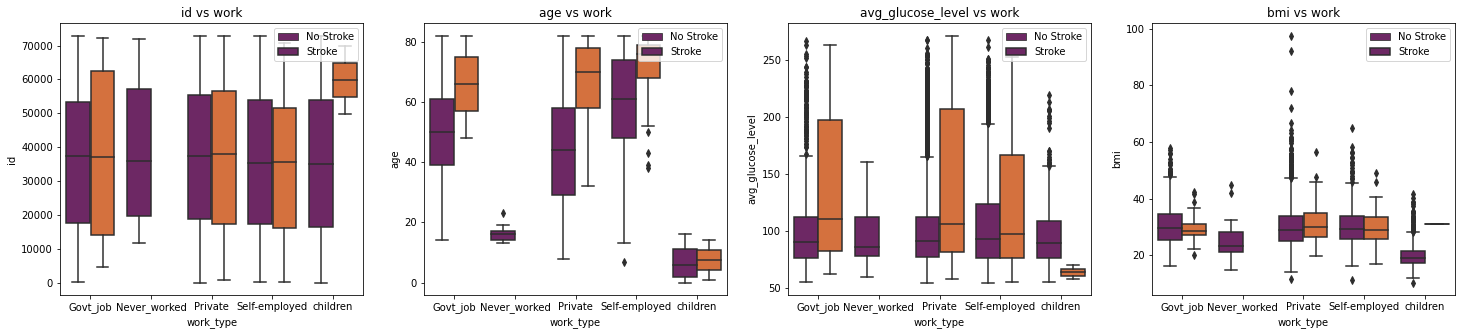

In [28]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = 'inferno');
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

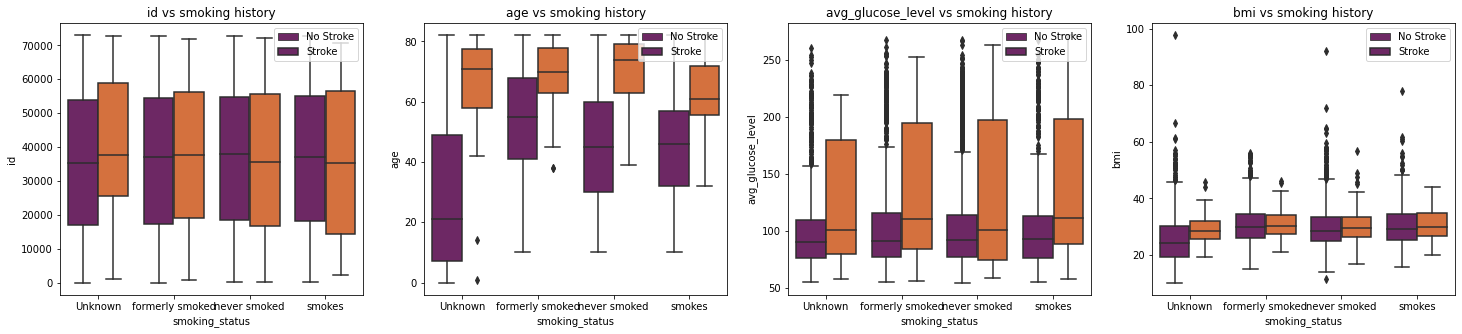

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,4,i+1)
    ax = sns.boxplot(x = 'smoking_status',y = discrete_features[i],data = df1,hue = 'stroke',palette = 'inferno');
    ax.set_xticklabels([tf1['smoking_status'][j] for j in sorted(df1['smoking_status'].unique())])
    title = discrete_features[i] + ' vs smoking history'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

In [30]:


import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51,0,0,1,2,0,166.29,25.6,1,0


In [31]:
X = df1.loc[:,:'smoking_status']
y = df1.loc[:,'stroke']



In [32]:
over_sample = RandomOverSampler(sampling_strategy ='all')
X_over,y_over = over_sample.fit_resample(X,y)
y_over = pd.Series(y_over)
y_over.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

To overcome the issue of class imbalance, imblearn was imported and RandomOverSampler was used to generate synthetic data for the class of 1, as previously it was shown that there were 4861 cases of no strokes compared to 249 cases of strokes. As the classes are now balanced, the analysis can proceed to the feature selection process and the generation of models to predict the outcomes of strokes given certain features.

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [34]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

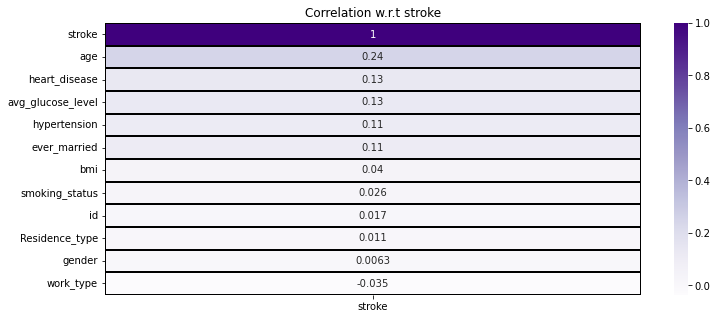

In [35]:


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))

plt.subplot(1,1,1)
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap =  "Purples",linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke');




When preparing to model algorithms to predict what factors contribute most to someone having a stroke, a correlation matrix of the features against strokes was plotted and based on the outcome, it can be concluded that no singular feature is responsible or highly correlated with the cases of patients with strokes. Another correlation matrix was also plotted to see the relationships between the features in the dataset, and none of them appear to be high co-correlated with each other. This makes the modelling of the features easier as there is a lack of a need to worry about including highly correlated features within the models, which may reduce its statistical power.

In [36]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap = "Purples", axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,stroke
stroke,1.00
age,0.24
heart_disease,0.13
avg_glucose_level,0.13
hypertension,0.11
ever_married,0.11
bmi,0.04
smoking_status,0.03
id,0.02
Residence_type,0.01


The correlation matrix above displays in descending order the features which have a higher correlation with the outcome of someone having a stroke. It is observed that most of the features are not highly correlated with strokes, except for age which has a correlation of 0.25 to stroked which is higher than the other features within the dataset. Again, the sheer class imbalance is hypothesised to be the reason that there is not much clarity on the correlation between the features of this dataset and strokes. This is because the occurrences of strokes is just too scarce.

In [37]:
# Feature Selection for Data Leakage :
df2 = df1.drop(columns = ['smoking_status', 'work_type', 'Residence_type', 'gender', 
                          'bmi']).copy(deep = True)



The features above were decided to be dropped as there is not much correlation between them and the target variable. It was decided to be more worthwile to use features with higher correlation to the target variable in the models.

In [38]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# No Data Leakage :

# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']]); x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]); x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']]); x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]); x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

# Data Leakage :

# Normalization
df2['age'] = mms.fit_transform(df2[['age']])
df2['avg_glucose_level'] = mms.fit_transform(df2[['avg_glucose_level']])

# Standardization
df2['hypertension'] = mms.fit_transform(df2[['hypertension']])
df2['heart_disease'] = mms.fit_transform(df2[['heart_disease']])
df2['ever_married'] = mms.fit_transform(df2[['ever_married']])

The features above were transformed using MinMaxScaler and StandardScaler libraries to normalize and standardize the features, this is to ensure it is usable when constructing the models. 

In [39]:
df2

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,stroke
0,9046,0.817073,0.0,1.0,1.0,0.801265,1
1,51676,0.743902,0.0,0.0,1.0,0.679023,1
2,31112,0.975610,0.0,1.0,1.0,0.234512,1
3,60182,0.597561,0.0,0.0,1.0,0.536008,1
4,1665,0.963415,1.0,0.0,1.0,0.549349,1
...,...,...,...,...,...,...,...
5105,18234,0.975610,1.0,0.0,1.0,0.132167,0
5106,44873,0.987805,0.0,0.0,1.0,0.323516,0
5107,19723,0.426829,0.0,0.0,1.0,0.128658,0
5108,37544,0.621951,0.0,0.0,1.0,0.513203,0


In [40]:
features=['age','hypertension','heart_disease','ever_married','avg_glucose_level']

from imblearn.over_sampling import SMOTE
X , y = df2[features],df2["stroke"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
sm = SMOTE()
X_res, y_res = sm.fit_resample(x_train,y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))



Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, the shape of train_X: (7788, 5)
After OverSampling, the shape of train_y: (7788,) 

After OverSampling, counts of label '1': 3894
After OverSampling, counts of label '0': 3894


To overcome class imbalance, SMOTE was used and the occurrence of class 1 was synthetically increased to solve the issue.

In [41]:
def plot_cm(cm,title):
    z = cm
    x = ['No stroke', 'stroke']
    y = x
    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='deep')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix {}</b></i>'.format(title),
                      #xaxis = dict(title='x'),
                      #yaxis = dict(title='x')
                     )

    # add custom xaxis title
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':0.5,
                            'y':-0.10,
                            'showarrow':False,
                            'text':"Predicted value",
                            'xref':"paper",
                            'yref':"paper"})
    
    fig.add_annotation({'font':{'color':"black",'size':14},
                            'x':-0.15,
                            'y':0.5,
                            'showarrow':False,
                            'text':"Real value",
                            'textangle':-90,
                            'xref':"paper",
                            'yref':"paper"})


    # adjust margins to make room for yaxis title
    fig.update_layout(margin={'t':50, 'l':20},width=750,height=750)
    


    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()



def hist_score(score):
    models_names = [
        'Logistic Regression',
    'KNearest Neighbor',
    'Decision Tree Classifier',
    'Random Forest Classifier']

    plt.rcParams['figure.figsize']=20,8
    sns.set_style('darkgrid')
    ax = sns.barplot(x=models_names, y=score, palette = "inferno", saturation =2.0)
    plt.xlabel('Classifier Models', fontsize = 20 )
    plt.ylabel('% of Accuracy', fontsize = 20)
    plt.title('Accuracy of different Classifier Models on test set', fontsize = 20)
    plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
    plt.yticks(fontsize = 12)
    for i in ax.patches:
        width, height = i.get_width(), i.get_height()
        x, y = i.get_xy() 
        ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [51]:
def run_exp_on_feature(x_train,y_train,x_test,y_test):
    #x_train,x_test,y_train,y_test = train_test_split(features,labels, test_size=0.2, random_state=23)
    models= [['Logistic Regression ',LogisticRegression()],
            ['KNearest Neighbor ',KNeighborsClassifier()],
            ['Decision Tree Classifier ',DecisionTreeClassifier()],
            ['Random Forest Classifier ',RandomForestClassifier()]]

    models_score = []
    for name,model in models:

        model = model
        model.fit(x_train,y_train)
        model_pred = model.predict(x_test)
        cm_model = confusion_matrix(y_test, model_pred)
        print(classification_report(y_test, model_pred))
        print(cm_model)
        models_score.append(accuracy_score(y_test,model.predict(x_test)))

        print(name)
        print('Validation Acuuracy: ',accuracy_score(y_test,model.predict(x_test)))
        print('Training Accuracy: ',accuracy_score(y_train,model.predict(x_train)))
        print('############################################')
        plot_cm(cm_model,title=name+"model")
        fpr, tpr, thresholds = roc_curve(y_test, model_pred)

        fig = px.area(
            x=fpr, y=tpr,
            title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
            labels={'x':'False Positive Rate', 'y':'True Positive Rate'},
            width=700, height=500
        )
        fig.add_shape(
            type='line', line={'dash':'dash'},
            x0=0, x1=1, y0=0, y1=1
        )

        fig.update_yaxes(scaleanchor="x", scaleratio=1)
        fig.update_xaxes(constrain='domain')
        fig.show()
    
        
    return models_score

Several functions were created to be called when running the 4 models. These includes functions to print out the confusion matrices, ROC curves and to print out the classification report and accuracy reports of the models.

In [54]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, roc_curve,precision_recall_curve, auc,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer


In [55]:


models_score = run_exp_on_feature(x_train,y_train,x_test,y_test)



              precision    recall  f1-score   support

           0       0.95      1.00      0.97       967
           1       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

[[967   0]
 [ 55   0]]
Logistic Regression 
Validation Acuuracy:  0.9461839530332681
Training Accuracy:  0.9525440313111546
############################################


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       967
           1       0.22      0.04      0.06        55

    accuracy                           0.94      1022
   macro avg       0.58      0.51      0.52      1022
weighted avg       0.91      0.94      0.92      1022

[[960   7]
 [ 53   2]]
KNearest Neighbor 
Validation Acuuracy:  0.9412915851272016
Training Accuracy:  0.9562133072407045
############################################


              precision    recall  f1-score   support

           0       0.95      0.94      0.95       967
           1       0.11      0.13      0.12        55

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.90      0.90      0.90      1022

[[911  56]
 [ 48   7]]
Decision Tree Classifier 
Validation Acuuracy:  0.898238747553816
Training Accuracy:  1.0
############################################


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       967
           1       0.17      0.05      0.08        55

    accuracy                           0.93      1022
   macro avg       0.56      0.52      0.52      1022
weighted avg       0.91      0.93      0.92      1022

[[952  15]
 [ 52   3]]
Random Forest Classifier 
Validation Acuuracy:  0.9344422700587084
Training Accuracy:  1.0
############################################


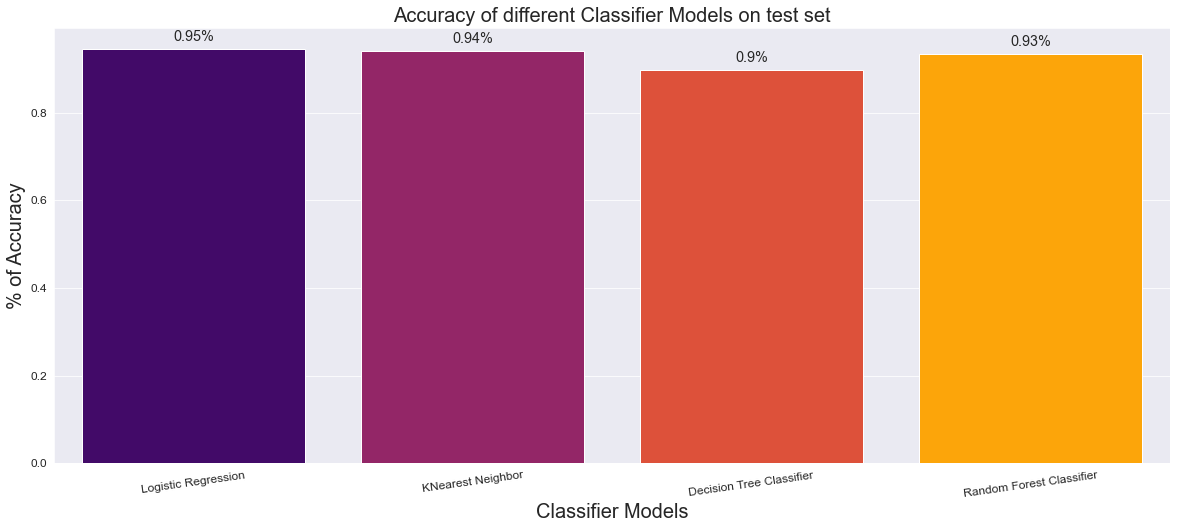

In [56]:
hist_score(models_score)

Among the 4 models used, logistic regression performed the best at a test accuracy score of 95%. These models can be further improved by using XGBoost or GridSearchCV to further finetune the hyperparameters and parameters in the models given the features in this dataset.